In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Apps dataset
apps_data = pd.read_csv(r"C:\Users\sneha\OneDrive\Desktop\apps.csv")
     

In [3]:
# Display the first few rows of the dataset
print(apps_data.head())
     

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [18]:
apps_data.shape

(9659, 14)

In [20]:
# Print the total number of apps
print('Total number of apps in the dataset =', len(apps_data))

# Print the total number of unique apps
num_unique_apps = len(apps_data['App'].unique())
print('Total number of unique apps in the dataset =', num_unique_apps)

# Display information about the DataFrame
print(apps_data.info())

# Have a look at a random sample of n rows
n = 5
print(apps_data.sample(n))


Total number of apps in the dataset = 9659
Total number of unique apps in the dataset = 9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None
      Unname

In [21]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps_data[col] = apps_data[col].astype(str).str.replace(char, '', regex=False)
    # Convert col to numeric
    apps_data[col] = pd.to_numeric(apps_data[col], errors='coerce')  # Adding errors='coerce' for safety


In [6]:
# Check for missing values
print(apps_data.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [7]:
# Fill missing values with appropriate strategy (e.g., mean, mode, median)
apps_data['Rating'].fillna(apps_data['Rating'].median(), inplace=True)
apps_data['Type'].fillna(apps_data['Type'].mode()[0], inplace=True)
apps_data['Current Ver'].fillna('Varies with device', inplace=True)
apps_data['Android Ver'].fillna('Varies with device', inplace=True)
     

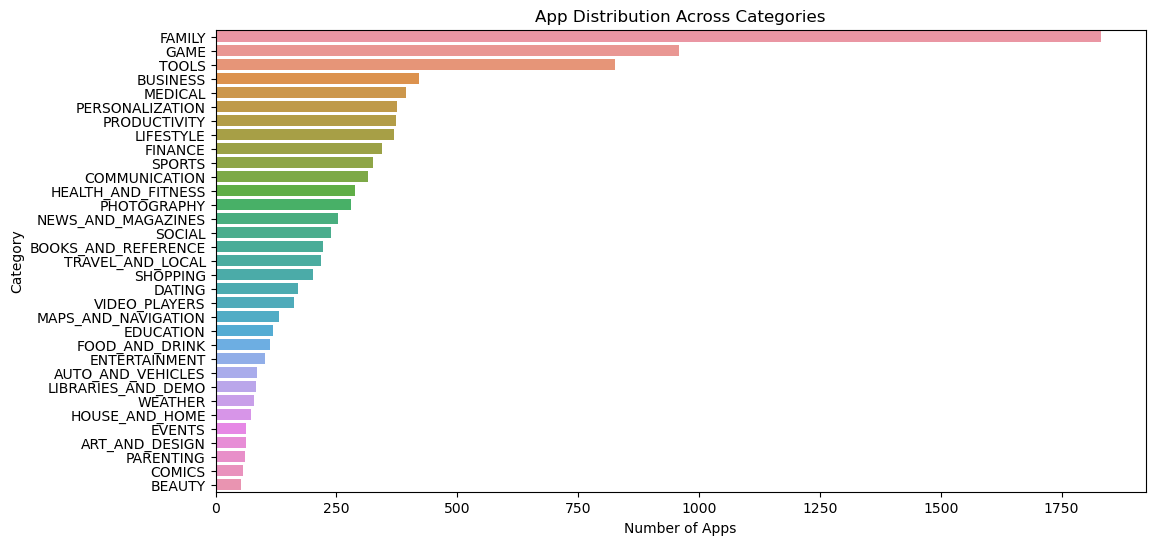

Successfully Imported Apps Data!
Average app rating = 4.173243045387994


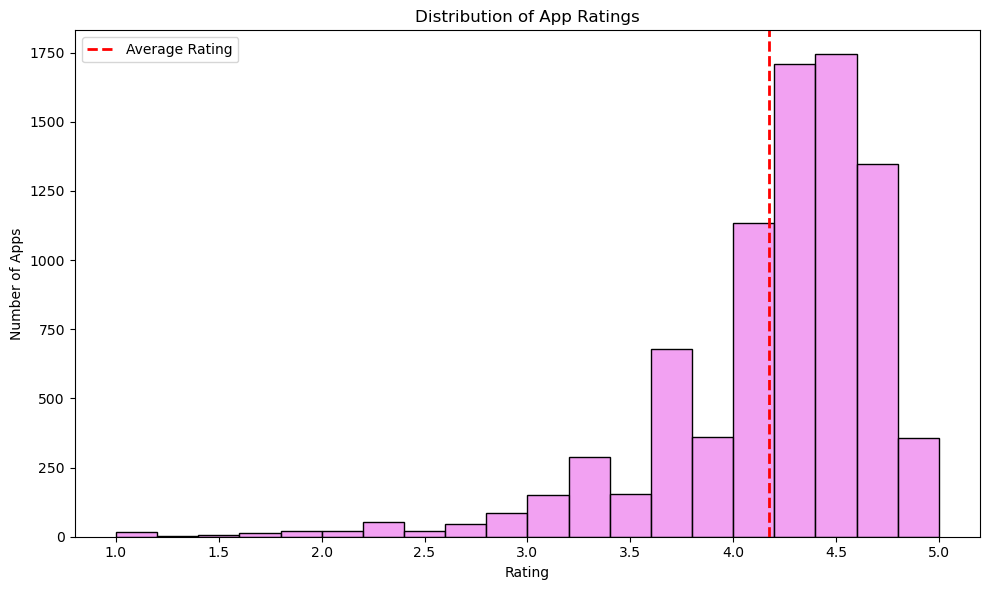

In [22]:

# Average rating of apps
avg_app_rating = apps_data['Rating'].mean()
print('Average app rating =', avg_app_rating)

# Distribution of apps according to their ratings
plt.figure(figsize=(10, 6))
sns.histplot(apps_data['Rating'], bins=20, kde=False, color='Violet')
plt.axvline(avg_app_rating, color='red', linestyle='--', linewidth=2, label='Average Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Ratings')
plt.legend()
plt.tight_layout()
plt.show()


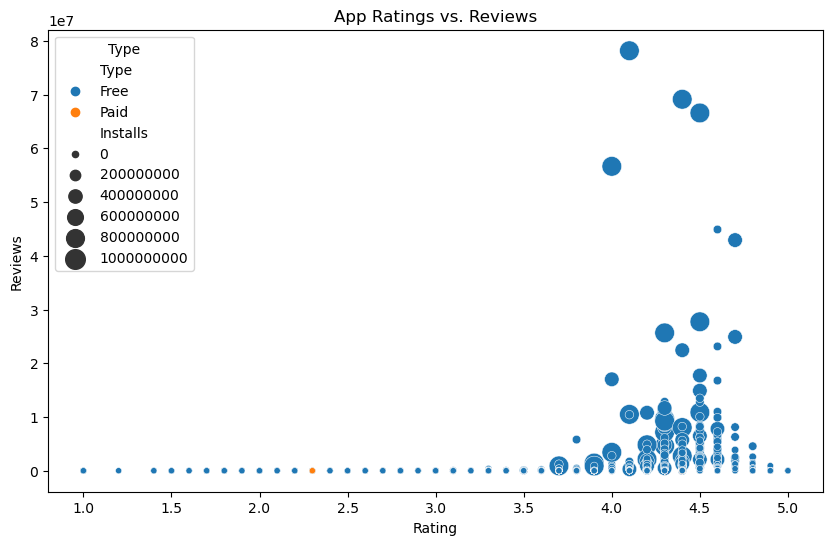

In [9]:
# Metrics Analysis
# Examine app ratings, size, popularity, and pricing trends
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Reviews', data=apps_data, hue='Type', size='Installs', sizes=(20, 200))
plt.title('App Ratings vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.legend(title='Type')
plt.show()


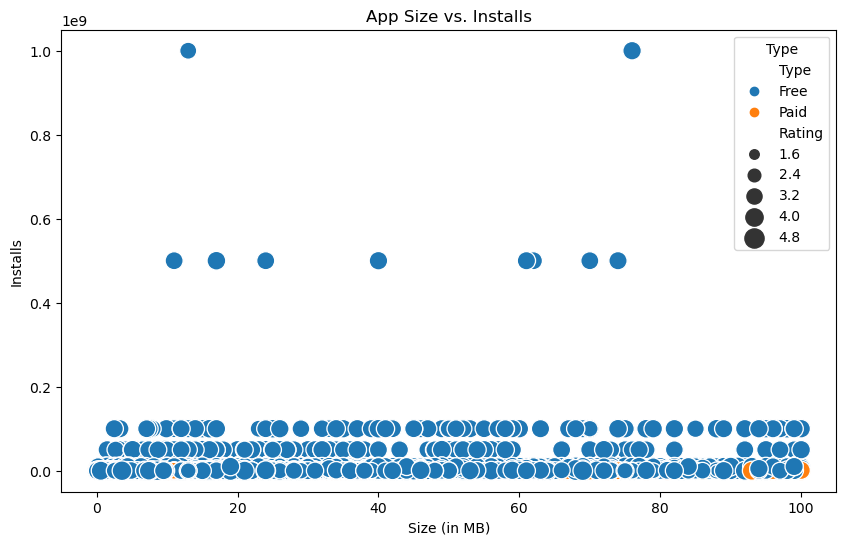

In [10]:
# Examine app popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Installs', data=apps_data, hue='Type', size='Rating', sizes=(20, 200))
plt.title('App Size vs. Installs')
plt.xlabel('Size (in MB)')
plt.ylabel('Installs')
plt.legend(title='Type')
plt.show()

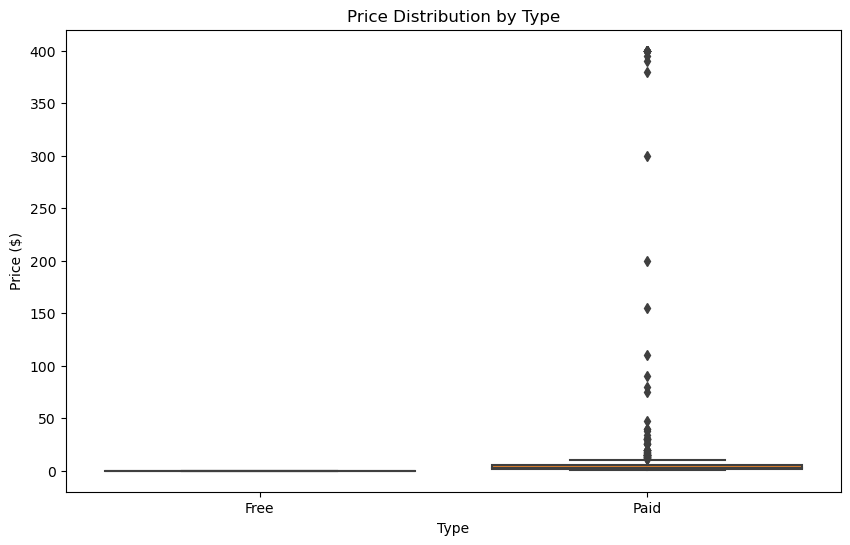

In [11]:
# Examine app pricing trends
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=apps_data)
plt.title('Price Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Price ($)')
plt.show()
     


In [12]:
# Sentiment Analysis (using user_review dataset)
user_review_data = pd.read_csv("C:\Users\sneha\OneDrive\Desktop\user_reviews.csv")

In [13]:
# Display the first few rows of the user_review dataset
print(user_review_data.head())


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


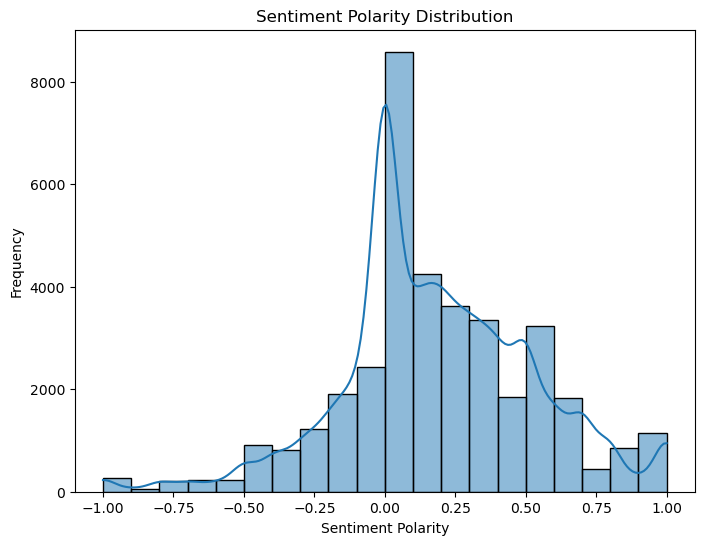

In [14]:
# Plot sentiment polarity distribution
plt.figure(figsize=(8, 6))
sns.histplot(user_review_data['Sentiment_Polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_12760\3665893598.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(apps_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


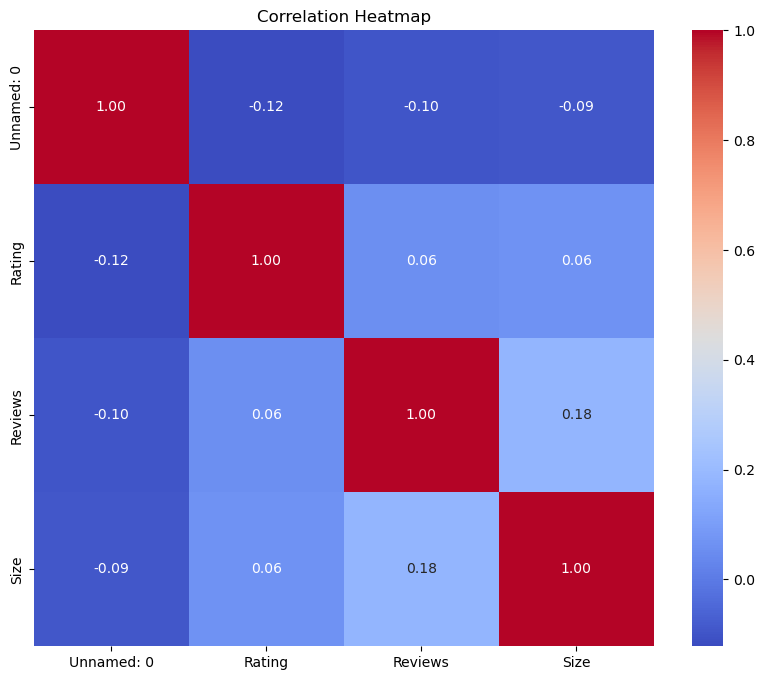

In [23]:
# Interactive Visualization
# Implement interactive visualizations using libraries like Plotly or Bokeh
# For simplicity, here's a static example of a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(apps_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
     